In [1]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')

In [2]:
antibodies = pd.read_csv('antibodies.txt', sep = '\t')

colors = {'anti-FLAG Sigma F1804': '#66C2A5', 
          'anti-ZNF143 Abcam ab58168': '#E5C494', 
          'anti-ZNF143 Novus Biologicals H00007702-M01': '#FC8D62', 
          'anti-ZNF143 Proteintech 16618-1-AP': '#E78AC3', 
          'anti-ZNF143 custom Carbon lab': '#8DA0CB', 
          'anti-ZNF143 custom Hernandez lab': '#B3B3B3',
          'anti-ZNF143 custom Tenen lab': '#FFD92F'}

title_wildcards = {'ENCODE_HepG2_ZNF143_ChIPseq_ENCLB338WAD': 'HepG2 (ENCODE)',
                   'ENCODE_HepG2_ZNF143_ChIPseq_ENCLB844JXX': 'HepG2 (ENCODE)',
                   'ENCODE_K562_ZNF143_ChIPseq_ENCLB046RFO': 'K562 (ENCODE)',
                   'ENCODE_K562_ZNF143_ChIPseq_ENCLB658FFM': 'K562 (ENCODE)',
                   'ENCODE_GM12878_ZNF143_ChIPseq_ENCLB209ACW': 'GM12878 (ENCODE)',
                   'ENCODE_GM12878_ZNF143_ChIPseq_ENCLB209ACX': 'GM12878 (ENCODE)',
                   'ENCODE_GM12878_ZNF143_ChIPseq_ENCLB901VQJ': 'GM12878 (ENCODE)',
                   'ENCODE_HeLa_ZNF143_ChIPseq_ENCLB209APP': 'HeLa (ENCODE)',
                   'ENCODE_HeLa_ZNF143_ChIPseq_ENCLB209APQ': 'HeLa (ENCODE)',
                   'ENCODE_K562_ZNF143_ChIPseq_ENCLB209AQS': 'K562 (ENCODE)',
                   'ENCODE_K562_ZNF143_ChIPseq_ENCLB209AQT': 'K562 (ENCODE)',
                   'Yan_LoVo_ZNF143_ChIPseq': 'LoVo (Yan et al.)',
                   'Treloar_MCF7_ZNF143_ChIPseq_rep1': 'MCF-7 (Treloar et al.)',
                   'Treloar_MCF7_ZNF143_ChIPseq_rep2': 'MCF-7 (Treloar et al.)',
                   'Ngondo-Mbongo_HeLa_ZNF143_ChIPseq_rep1': 'HeLa (Ngondo-Mbongo et al.)',
                   'Ngondo-Mbongo_HeLa_ZNF143_ChIPseq_rep2': 'HeLa (Ngondo-Mbongo et al.)',
                   'Ngondo-Mbongo_K562_ZNF143_ChIPseq': 'K562 (Ngondo-Mbongo et al.)',
                   'ENCODE_H1_ZNF143_ChIPseq_ENCLB209ABL': 'H1 (ENCODE)',
                   'ENCODE_H1_ZNF143_ChIPseq_ENCLB209AIM': 'H1 (ENCODE)',
                   'Ngondo-Mbongo_HEK293_ZNF143_ChIPseq': 'HEK293 (Ngondo-Mbongo et al.)',
                   'Michaud_HeLa_ZNF143_ChIPseq': 'HeLa (Michaud et al.)',
                   'Tao_BE2C_ZNF143_ChIPseq': 'BE2-C (Tao et al.)',
                   'Lyu_H9_ZNF143_ChIPseq': 'H9 (Lyu et al.)',
                   'Tenen_U937_ZNF143_ChIPexo': 'U-937 (Tenen et al.)',
                   'ENCODE_WTC11_ZNF143_ChIPseq_ENCLB573UDX': 'WTC11 (ENCODE)',
                   'ENCODE_WTC11_ZNF143_ChIPseq_ENCLB656SHY': 'WTC11 (ENCODE)',
                   'Wang_CUTLL_ZNF143_ChIPseq': 'CUTLL (Wang et al.)',
                   'Ngondo-Mbongo_HPB_ALL_ZNF143_ChIPseq': 'HPB-ALL (Ngondo-Mbongo et al.)',
                   'Cobo_Macrophages_ZNF143_ChIPseq_rep1': 'Macrophages (Cobo et al.)',
                   'Cobo_Macrophages_ZNF143_ChIPseq_rep2': 'Macrophages (Cobo et al.)',
                   'Zhang_HEC1B_ZNF143_ChIPnexus': 'HEC-1B (Zhang et al.)',
                   'Zhang_HEC1B_AID_ZNF143_ChIPnexus': 'HEC-1B (Zhang et al.)',
                   'Jung_Sperm_Zfp143_ChIPseq_rep1': 'Sperm (Jung et al.)',
                   'Jung_Sperm_Zfp143_ChIPseq_rep2': 'Sperm (Jung et al.)',
                   'Ngondo-Mbongo_3T3_Zfp143_ChIPseq': 'NIH-3T3 (Ngondo-Mbongo et al.)',
                   'Ngondo-Mbongo_MEF_Zfp143_ChIPseq': 'MEF (Ngondo-Mbongo et al.)',
                   'Ngondo-Mbongo_mESC_Zfp143_ChIPseq': 'J1 (Ngondo-Mbongo et al.)',
                   'Zhou_WT_Zfp143_ChIPseq_rep1': 'HSPC (Zhou et al.)',
                   'Zhou_WT_Zfp143_ChIPseq_rep2': 'HSPC (Zhou et al.)'}

### Calculate fraction of ZNF143 peaks overlapping CTCF peaks (hg38)

In [ ]:
hg38_znf143_peaks = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/chipseq/public_data/peaks/') if '.bed' in x and 'hg19' not in x and '.fa' not in x and 'all_peaks' not in x])
hg38_znf143_peaks = [x for x in hg38_znf143_peaks if 'CTCF' not in x and 'Zfp143' not in x]

len(hg38_znf143_peaks)

In [ ]:
hg38_ctcf_peaks = sorted(os.listdir('/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/cistrome_hg38/'))
hg38_ctcf_peaks = [x for x in hg38_ctcf_peaks if 'CTCF' in x]

len(hg38_ctcf_peaks)

In [ ]:
folder_znf143 = '/DATA/users/magnitov/znf143/chipseq/public_data/peaks/'
folder_ctcf = '/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/cistrome_hg38/'

hg38_overlap_fractions = []

for i in range(0, len(hg38_znf143_peaks)):
    for j in range(0, len(hg38_ctcf_peaks)):
        p = subprocess.run(["bedtools", "intersect", 
                            "-a", folder_znf143 + hg38_znf143_peaks[i],
                            "-b", folder_ctcf + hg38_ctcf_peaks[j],
                            "-wa"], 
                            stdout=subprocess.PIPE)
        overlap = len(np.unique(p.stdout.decode('utf-8').split('\n')))-1
        total = len(pd.read_csv(folder_znf143 + hg38_znf143_peaks[i], sep = '\t', header = None))
        hg38_overlap_fractions.append(overlap/total)

In [ ]:
hg38_overlap_fractions_df = pd.DataFrame(np.array(hg38_overlap_fractions).reshape((len(hg38_znf143_peaks), len(hg38_ctcf_peaks))),
                                         index = [x.replace('.bed', '') for x in hg38_znf143_peaks], 
                                         columns = ['_'.join(x.replace('.bed', '').split('_')[1:]) for x in hg38_ctcf_peaks])
hg38_overlap_fractions_df.to_csv('/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/overlap_ZNF143_with_CTCF.txt', index = 1, header = 1, sep = '\t')

### Calculate fraction of Zfp143 peaks overlapping Ctcf peaks (mm10)

In [ ]:
mm10_znf143_peaks = sorted([x for x in os.listdir('/DATA/users/magnitov/znf143/chipseq/public_data/peaks/') if '.bed' in x and 'hg19' not in x and '.fa' not in x])
mm10_znf143_peaks = [x for x in mm10_znf143_peaks if 'CTCF' not in x and 'ZNF143' not in x]

len(mm10_znf143_peaks)

In [ ]:
mm10_ctcf_peaks = sorted(os.listdir('/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/cistrome_mm10/'))
mm10_ctcf_peaks = [x for x in mm10_ctcf_peaks if 'CTCF' in x]

len(mm10_ctcf_peaks)

In [ ]:
folder_znf143 = '/DATA/users/magnitov/znf143/chipseq/public_data/peaks/'
folder_ctcf = '/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/cistrome_mm10/'

mm10_overlap_fractions = []

for i in range(0, len(mm10_znf143_peaks)):
    for j in range(0, len(mm10_ctcf_peaks)):
        p = subprocess.run(["bedtools", "intersect", 
                            "-a", folder_znf143 + mm10_znf143_peaks[i],
                            "-b", folder_ctcf + mm10_ctcf_peaks[j],
                            "-wa"], 
                            stdout=subprocess.PIPE)
        overlap = len(np.unique(p.stdout.decode('utf-8').split('\n')))-1
        total = len(pd.read_csv(folder_znf143 + mm10_znf143_peaks[i], sep = '\t', header = None))
        mm10_overlap_fractions.append(overlap/total)

In [ ]:
mm10_overlap_fractions_df = pd.DataFrame(np.array(mm10_overlap_fractions).reshape((len(mm10_znf143_peaks), len(mm10_ctcf_peaks))),
                                         index = [x.replace('.bed', '') for x in mm10_znf143_peaks], 
                                         columns = ['_'.join(x.replace('.bed', '').split('_')[1:]) for x in mm10_ctcf_peaks])
mm10_overlap_fractions_df.to_csv('/DATA/users/magnitov/znf143/chipseq/public_data/cistrome_data/overlap_Zfp143_with_Ctcf.txt', index = 1, header = 1, sep = '\t')

## Plot the overlap between re-analysed ZNF143 peaks and CTCF peaks from CISTROME

In [5]:
znf143_fraction_ctcf_hg38 = pd.read_csv('./cistrome_data/overlap_ZNF143_with_CTCF.txt', sep = '\t', index_col = 0)
znf143_fraction_ctcf_hg38['Sample'] = znf143_fraction_ctcf_hg38.index
znf143_fraction_ctcf_hg38 = znf143_fraction_ctcf_hg38.merge(antibodies, on = 'Sample')
znf143_fraction_ctcf_hg38 = znf143_fraction_ctcf_hg38.sort_values(['Antibody', 'Sample'])
znf143_fraction_ctcf_hg38.head()

,CTCF_HeLa_Epithelium_Cervix_GSM325897,CTCF_HepG2_Epithelium_Liver_GSM614637,CTCF_HepG2_Epithelium_Liver_GSM614636,CTCF_HepG2_Epithelium_Liver_GSM614631,CTCF_HepG2_Epithelium_Liver_GSM614630,CTCF_Jurkat_T_Lymphocyte_Blood_GSM325899,CTCF_MCF-7_Epithelium_Breast_GSM614615,CTCF_MCF-7_Epithelium_Breast_GSM614614,CTCF_Proerythroblast_Bone_Marrow_GSM651543,CTCF_Proerythroblast_Bone_Marrow_GSM651542,...,CTCF_MCF-7_Epithelium_Breast_GSM2747713,CTCF_MCF-7_Epithelium_Breast_GSM2747712,CTCF_293T_GSM2777336,CTCF_MCF-7_Epithelium_Breast_GSM2747711,CTCF_MCF-7_Epithelium_Breast_GSM2877977,CTCF_NB69_GSM2871000,CTCF_MCF-7_Epithelium_Breast_GSM2747725,CTCF_BCBL1_B_cell_lymphoma_GSM941710,Sample,Antibody
9,0.083071,0.296861,0.156355,0.289309,0.282671,0.099732,0.281689,0.230790,0.215991,0.213824,...,0.370822,0.330523,0.000068,0.222053,0.305259,0.215077,0.304040,0.375868,ENCODE_HepG2_ZNF143_ChIPseq_ENCLB338WAD,anti-FLAG Sigma F1804
10,0.066747,0.302772,0.138407,0.277834,0.272458,0.087605,0.297488,0.229443,0.222675,0.211644,...,0.409382,0.348011,0.000278,0.211458,0.315009,0.208863,0.305368,0.460647,ENCODE_HepG2_ZNF143_ChIPseq_ENCLB844JXX,anti-FLAG Sigma F1804
11,0.060917,0.276697,0.120734,0.227156,0.222018,0.082569,0.281468,0.209541,0.208807,0.194128,...,0.418349,0.322569,0.000367,0.190826,0.290275,0.189358,0.278165,0.515229,ENCODE_K562_ZNF143_ChIPseq_ENCLB046RFO,anti-FLAG Sigma F1804
14,0.081778,0.303576,0.154615,0.262819,0.257165,0.101367,0.295951,0.234946,0.237313,0.229424,...,0.390876,0.332369,0.000263,0.215882,0.317512,0.215619,0.289245,0.459111,ENCODE_K562_ZNF143_ChIPseq_ENCLB658FFM,anti-FLAG Sigma F1804
15,0.042395,0.262171,0.104919,0.214492,0.209083,0.058750,0.264310,0.198516,0.197383,0.183545,...,0.382815,0.306328,0.000252,0.176878,0.297396,0.178639,0.253617,0.428733,ENCODE_WTC11_ZNF143_ChIPseq_ENCLB573UDX,anti-FLAG Sigma F1804


In [6]:
znf143_fraction_ctcf_mm10 = pd.read_csv('./cistrome_data/overlap_Zfp143_with_Ctcf.txt', sep = '\t', index_col = 0)
znf143_fraction_ctcf_mm10['Sample'] = znf143_fraction_ctcf_mm10.index
znf143_fraction_ctcf_mm10 = znf143_fraction_ctcf_mm10.merge(antibodies, on = 'Sample')
znf143_fraction_ctcf_mm10 = znf143_fraction_ctcf_mm10.sort_values(['Antibody', 'Sample'])
znf143_fraction_ctcf_mm10.head()

,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535768,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535761,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535754,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535747,CTCF_Cortex_GSM722631,CTCF_Bone_Marrow_GSM722636,CTCF_Cerebellum_GSM722663,CTCF_R1_Embryonic_Stem_Cell_Embryo_GSM634247,CTCF_V6.5_Embryonic_Stem_Cell_Embryo_GSM560352,CTCF_V6.5_Embryonic_Stem_Cell_Embryo_GSM560351,...,CTCF_Epithelium_Kidney_GSM722698,CTCF_Epithelium_Liver_GSM722759,CTCF_Epithelium_Lung_GSM722859,CTCF_Spleen_GSM722990,CTCF_Fibroblast_Embryo_GSM723004,CTCF_Dendritic_Cell_Bone_Marrow_GSM881052,CTCF_Dendritic_Cell_Bone_Marrow_GSM881053,CTCF_Dendritic_Cell_Bone_Marrow_GSM881054,Sample,Antibody
0,0.200922,0.162010,0.203965,0.180636,0.204703,0.148456,0.320793,0.049977,0.107976,0.059382,...,0.436053,0.555371,0.262333,0.276533,0.237437,0.134532,0.124389,0.127616,Jung_Sperm_Zfp143_ChIPseq_rep1,anti-ZNF143 Proteintech 16618-1-AP
1,0.205080,0.159763,0.212296,0.181844,0.204070,0.150527,0.332227,0.038245,0.097705,0.051378,...,0.452013,0.593592,0.262808,0.295136,0.244913,0.131188,0.119065,0.121807,Jung_Sperm_Zfp143_ChIPseq_rep2,anti-ZNF143 Proteintech 16618-1-AP
2,0.186652,0.163019,0.187189,0.182490,0.187055,0.134685,0.250839,0.076809,0.122197,0.073452,...,0.313549,0.394656,0.228280,0.204512,0.193098,0.130120,0.128642,0.123943,Ngondo-Mbongo_3T3_Zfp143_ChIPseq,anti-ZNF143 custom Carbon lab
3,0.176431,0.148148,0.180471,0.160606,0.186532,0.138721,0.273401,0.067340,0.103367,0.070370,...,0.358923,0.475084,0.247475,0.224579,0.193603,0.116162,0.115152,0.112795,Ngondo-Mbongo_MEF_Zfp143_ChIPseq,anti-ZNF143 custom Carbon lab
4,0.127414,0.114147,0.124655,0.120583,0.139761,0.095757,0.179036,0.064101,0.079338,0.044923,...,0.226323,0.275581,0.164061,0.143176,0.138316,0.092999,0.092079,0.087613,Ngondo-Mbongo_mESC_Zfp143_ChIPseq,anti-ZNF143 custom Carbon lab


In [7]:
cistrome_hg38_overlaps = pd.DataFrame()

for dataset in znf143_fraction_ctcf_hg38['Sample']:
    cn = dataset 
    fs = znf143_fraction_ctcf_hg38[znf143_fraction_ctcf_hg38['Sample'] == dataset].drop(['Sample', 'Antibody'], axis = 1).values[0]
    ctrm = list(znf143_fraction_ctcf_hg38.columns[:-3])

    df_to_add = pd.DataFrame([[cn]*len(fs), fs, ctrm]).transpose()
    
    cistrome_hg38_overlaps = pd.concat([cistrome_hg38_overlaps, df_to_add])
    
cistrome_hg38_overlaps.columns = ['Dataset', 'Overlap', 'CISTROME']
cistrome_hg38_overlaps

,Dataset,Overlap,CISTROME
0,ENCODE_HepG2_ZNF143_ChIPseq_ENCLB338WAD,0.083071,CTCF_HeLa_Epithelium_Cervix_GSM325897
1,ENCODE_HepG2_ZNF143_ChIPseq_ENCLB338WAD,0.296861,CTCF_HepG2_Epithelium_Liver_GSM614637
2,ENCODE_HepG2_ZNF143_ChIPseq_ENCLB338WAD,0.156355,CTCF_HepG2_Epithelium_Liver_GSM614636
3,ENCODE_HepG2_ZNF143_ChIPseq_ENCLB338WAD,0.289309,CTCF_HepG2_Epithelium_Liver_GSM614631
4,ENCODE_HepG2_ZNF143_ChIPseq_ENCLB338WAD,0.282671,CTCF_HepG2_Epithelium_Liver_GSM614630
...,...,...,...
507,Michaud_HeLa_ZNF143_ChIPseq,0.183521,CTCF_MCF-7_Epithelium_Breast_GSM2747711
508,Michaud_HeLa_ZNF143_ChIPseq,0.294632,CTCF_MCF-7_Epithelium_Breast_GSM2877977
509,Michaud_HeLa_ZNF143_ChIPseq,0.189139,CTCF_NB69_GSM2871000
510,Michaud_HeLa_ZNF143_ChIPseq,0.272784,CTCF_MCF-7_Epithelium_Breast_GSM2747725


In [8]:
cistrome_mm10_overlaps = pd.DataFrame()

for dataset in znf143_fraction_ctcf_mm10['Sample']:
    cn = dataset 
    fs = znf143_fraction_ctcf_mm10[znf143_fraction_ctcf_mm10['Sample'] == dataset].drop(['Sample', 'Antibody'], axis = 1).values[0]
    ctrm = list(znf143_fraction_ctcf_mm10.columns[:-3])

    df_to_add = pd.DataFrame([[cn]*len(fs), fs, ctrm]).transpose()
    
    cistrome_mm10_overlaps = pd.concat([cistrome_mm10_overlaps, df_to_add])
    
cistrome_mm10_overlaps.columns = ['Dataset', 'Overlap', 'CISTROME']
cistrome_mm10_overlaps

,Dataset,Overlap,CISTROME
0,Jung_Sperm_Zfp143_ChIPseq_rep1,0.200922,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535768
1,Jung_Sperm_Zfp143_ChIPseq_rep1,0.16201,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535761
2,Jung_Sperm_Zfp143_ChIPseq_rep1,0.203965,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535754
3,Jung_Sperm_Zfp143_ChIPseq_rep1,0.180636,CTCF_3T3-L1_Preadipocyte_Adipose_GSM535747
4,Jung_Sperm_Zfp143_ChIPseq_rep1,0.204703,CTCF_Cortex_GSM722631
...,...,...,...
455,Zhou_WT_Zfp143_ChIPseq_rep2,0.293056,CTCF_Spleen_GSM722990
456,Zhou_WT_Zfp143_ChIPseq_rep2,0.221979,CTCF_Fibroblast_Embryo_GSM723004
457,Zhou_WT_Zfp143_ChIPseq_rep2,0.130126,CTCF_Dendritic_Cell_Bone_Marrow_GSM881052
458,Zhou_WT_Zfp143_ChIPseq_rep2,0.126845,CTCF_Dendritic_Cell_Bone_Marrow_GSM881053


In [9]:
srt = pd.DataFrame()
for dataset in np.unique(cistrome_hg38_overlaps['Dataset']):
    m = np.median(cistrome_hg38_overlaps[cistrome_hg38_overlaps['Dataset'] == dataset]['Overlap'])
    srt = pd.concat([srt, pd.DataFrame([dataset, m]).transpose()])
sort_order_hg38 = list(srt.sort_values([1], ascending  = False)[0].values)

srt = pd.DataFrame()
for dataset in np.unique(cistrome_mm10_overlaps['Dataset']):
    m = np.median(cistrome_mm10_overlaps[cistrome_mm10_overlaps['Dataset'] == dataset]['Overlap'])
    srt = pd.concat([srt, pd.DataFrame([dataset, m]).transpose()])
sort_order_mm10 = list(srt.sort_values([1], ascending  = False)[0].values)

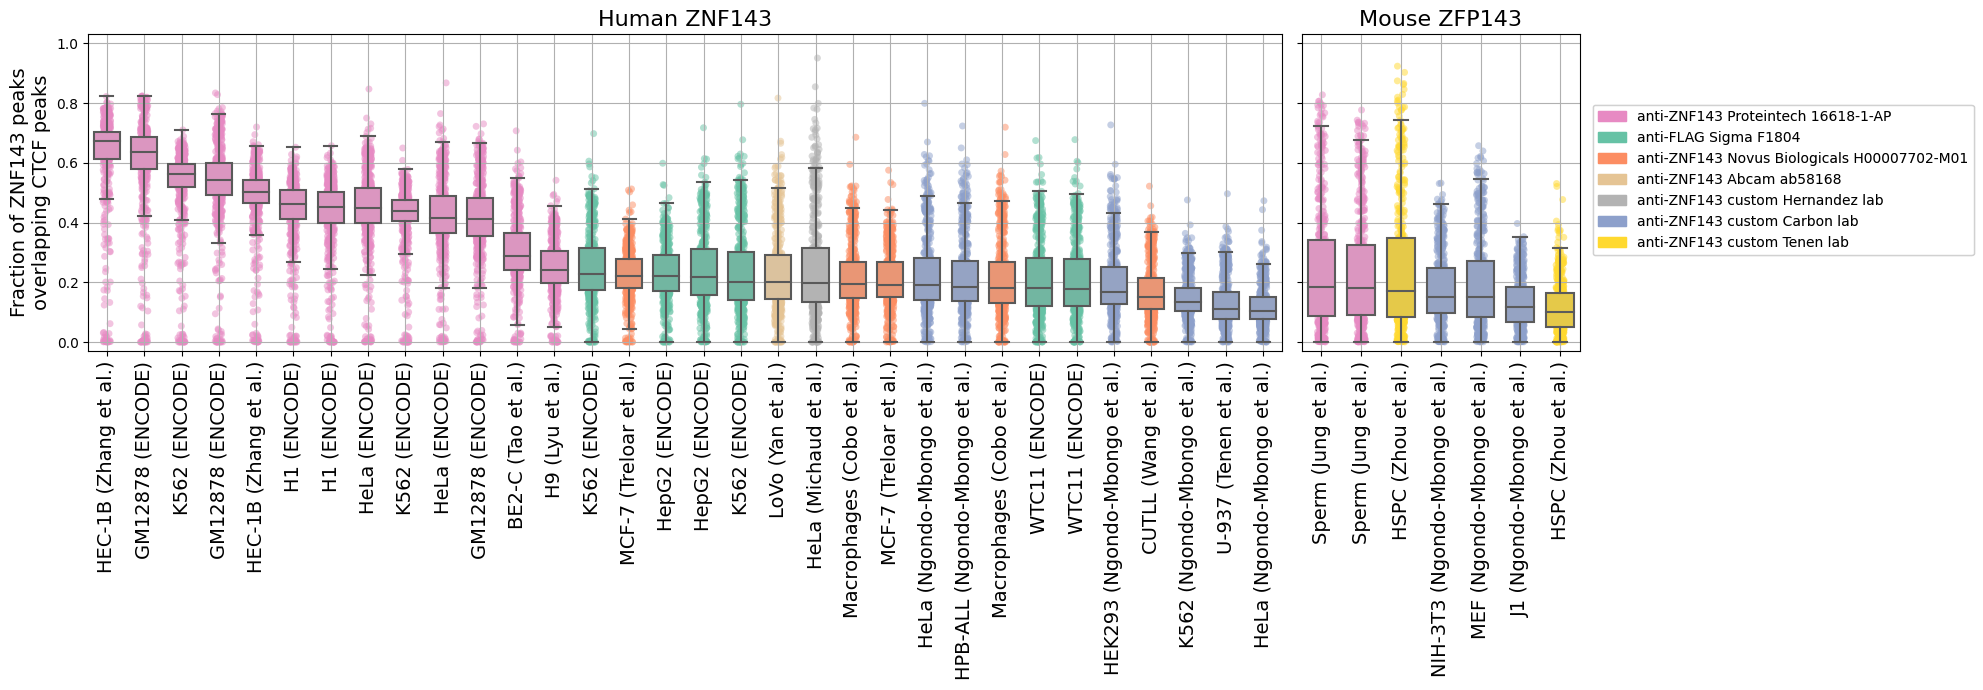

In [11]:
fig = plt.figure(figsize = (16, 7))
gs = fig.add_gridspec(nrows = 1, ncols = 2, width_ratios=(30, 7))

###
### Human ZNF143 datasets
###
ax1 = fig.add_subplot(gs[0])
plt.title('Human ZNF143', fontsize = 16)

sns.stripplot(data = cistrome_hg38_overlaps, x = 'Dataset', y = 'Overlap', order = sort_order_hg38, alpha = 0.5, 
              palette = [colors[antibodies[antibodies['Sample'] == x]['Antibody'].values[0]] for x in sort_order_hg38], 
              zorder = 0, legend = False)
sns.boxplot(data = cistrome_hg38_overlaps, x = 'Dataset', y = 'Overlap',
            fliersize = 0, order = sort_order_hg38, width = 0.7,
            palette = [colors[antibodies[antibodies['Sample'] == x]['Antibody'].values[0]] for x in sort_order_hg38],
            zorder = 10)

plt.xticks(np.arange(len(sort_order_hg38)), [title_wildcards[x] for x in sort_order_hg38], rotation = 90, fontsize = 14)
plt.xlabel('')
plt.ylabel('Fraction of ZNF143 peaks\noverlapping CTCF peaks', fontsize = 14)
plt.ylim((-0.03, 1.03))
ax1.set_axisbelow(True)
plt.grid()

###
### Mouse ZFP143 datasets
###
ax2 = fig.add_subplot(gs[1])
plt.title('Mouse ZFP143', fontsize = 16)
sns.stripplot(data = cistrome_mm10_overlaps, x = 'Dataset', y = 'Overlap', order = sort_order_mm10, alpha = 0.5, 
              palette = [colors[antibodies[antibodies['Sample'] == x]['Antibody'].values[0]] for x in sort_order_mm10], zorder = 0, legend = False)
sns.boxplot(data = cistrome_mm10_overlaps, x = 'Dataset', y = 'Overlap',
            fliersize = 0, order = sort_order_mm10, width = 0.7, 
            palette = [colors[antibodies[antibodies['Sample'] == x]['Antibody'].values[0]] for x in sort_order_mm10], zorder = 10)

plt.xticks(np.arange(len(sort_order_mm10)), [title_wildcards[x] for x in sort_order_mm10], rotation = 90, fontsize = 14)
plt.xlabel('')
plt.ylabel('')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], [])
plt.ylim((-0.03, 1.03))
ax2.set_axisbelow(True)
plt.grid()

p1 = mpatches.Patch(color = '#E78AC3', label = 'anti-ZNF143 Proteintech 16618-1-AP')
p2 = mpatches.Patch(color = '#66C2A5', label = 'anti-FLAG Sigma F1804')
p3 = mpatches.Patch(color = '#FC8D62', label = 'anti-ZNF143 Novus Biologicals H00007702-M01')
p4 = mpatches.Patch(color = '#E5C494', label = 'anti-ZNF143 Abcam ab58168')
p5 = mpatches.Patch(color = '#B3B3B3', label = 'anti-ZNF143 custom Hernandez lab')
p6 = mpatches.Patch(color = '#8DA0CB', label = 'anti-ZNF143 custom Carbon lab')
p7 = mpatches.Patch(color = '#FFD92F', label = 'anti-ZNF143 custom Tenen lab')
legend2 = plt.legend(handles = [p1, p2, p3, p4, p5, p6, p7], fontsize = 10, bbox_to_anchor = (1.02, 0.8))
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.show()